# Team Project 4 - Linear Algebra and Data Compression
## Chris Hayduk

Linear algebra provides many powerful and interesting applications. Examples include:
<ul>
    <li>Face recognition via Eigenface;</li>
    <li>Image compression using Singular Value Decomposition;</li>
    <li>JPEG/MPEG compression via discrete cosine transform;</li>
    <li>Signal/sound compression via Fourier series.</li>
</ul>
A common feature is that by using technique of linear algebra, one may find a very nice approximation of given data (in a very big or even infinite dimensional vector space) in a reasonable small vector space. 

In this project, we investigate how to compress continous sound data by using finitely many numbers.

Sound data is given as a continuous function $f(t)$. If we divide the time interval into reasonably small subintervals, then on each interval the function $f(t)$ looks like a periodic function, because sound is a vibration that propagates as a (in general very complicated) wave of pressure and a wave is periodic. From now on, for simplicity, assume that the period of $f(t)$ is $2\pi$ and we will assume that $f(t) \in C([-\pi, \pi])$. 

On $C([-\pi, \pi])$, the following formula yields an inner product:
$$(g, h) = \frac{1}{\pi}\int_{-\pi}^{\pi}g(t)h(t)dt.$$
Furthermore, from homework, we know that the following set is an orthonormal set. 
$$B_n := \{\frac{1}{\sqrt{2}}, \sin t, \cos t, \sin 2t, \cos 2t, \cdots, \sin nt, \cos nt\}$$
Let $W_n$ be the sub vector space of $C([-\pi, \pi])$ generated by $B_n$. Then for any $f(t) \in C([-\pi, \pi])$, its best approximation in $W_n$ is given by
$$\hat{f}_n(t) := (f(t), \frac{1}{\sqrt{2}})\frac{1}{\sqrt{2}} + \sum_{k=1}^n (f(t), \sin kt)\sin kt + \sum_{k=1}^n (f(t), \cos kt)\cos kt.$$

#### 1. (20 pts) Construct a function Simpson(f, m) which evaluates the definite integral $$\int_{-\pi}^{\pi}f(t)dt$$ with $m$ intervals by using Simpson's rule. Note that $m$ has to be an even number.

In [1]:
import numpy as np

#Simpson function definition
#Takes in a function f and a number m representing the number of intervals
def Simpson(f, m):
    pi = np.pi
    
    #Initialize h
    h = (pi - (-pi))/m
    
    #Initialize integral value
    integral = 0.0
    
    #Create list of points to evalue function at
    x = []
    
    for i in range(m+1):
        x.append(-pi + i*h)
    
    #Run Simpson's rule algorithm
    for i in range(len(x)):
        if i == 0 or i == len(x)-1:
            integral += f(x[i])
        elif i % 2 == 0:
            integral += 2*f(x[i])
        else:
            integral += 4*f(x[i])
        
    integral = integral*(h/3)
    
    return(integral)        
    
#Example run
#Target integral value from Wolfram is: 20.670851120199880
Simpson(lambda x: x**2, 10)

20.670851120199877

#### 2. (15 pts) Create a function FourierCoeff(f, n) which returns the list of Fourier coefficients $a_0, a_1, \cdots, a_n$ and $b_1, b_2, \cdots, b_n$ where $a_0 = (f(t), \frac{1}{\sqrt{2}})$, $a_k = (f(t), \cos kt)$ for $k \ge 1$, $b_k = (f(t), \sin kt)$. To calculate each coefficient, use the function Simpson(f, m) with $m = 20$.

In [16]:
#Definition for FourierCoeff function
#Takes in a function f and a scalar n as input
def FourierCoeff(f, n):
    pi = np.pi
    
    #Initialize the a and b vectors
    a = []
    b = []
    
    #Define function for a_0
    def a_0_func(x):
            return f(x) * 1/np.sqrt(2)
        
    #Loop through the n coefficients
    for i in range(n):
        #Define function for a_i where i > 0
        def a_i_func(x):
            return f(x) * np.cos(i*x)
        
        #Define function for b_i
        def b_i_func(x):
            return f(x) * np.sin(i*x)
        
        #Compute coefficients
        if i == 0:
            a_val = 1/pi * Simpson(a_0_func, 200)
            a.append(a_val)
        else:
            a_val = 1/pi * Simpson(a_i_func, 200)
            a.append(a_val)
        
        b_val = 1/pi * Simpson(b_i_func, 200)
        b.append(b_val)
        
    return (a,b)

#Test run
a, b = FourierCoeff(lambda x: x/np.pi, 10)

print('a:', a, '\n')
print('b:', b)

a: [1.6949404842610725e-16, -1.5321077739827162e-16, 2.612724851284535e-16, -1.5173048003210473e-16, 9.843977485009723e-17, -1.1324274851176597e-16, 1.6061226422910602e-16, -1.8281672472160914e-16, 2.509104035652854e-16, -2.0206059048177852e-16] 

b: [0.0, 0.6366197758131277, -0.31830991375788403, 0.2122066839064793, -0.15915516399616536, 0.12732438638449584, -0.10610404270465397, 0.09094687028844198, -0.07957924881121202, 0.07073806587609037]


Note that the initial data is a continuous function, but the approximation is recorded as a list of $2n+1$ numbers!

#### 3. (15 pts) Create a function FourierApprox(f, n) which plots the graphs of $f(t)$ and $\hat{f}_n(t)$ with $n = 1, 2, 3, 5, 10$ over $[-\pi, \pi]$ on the same plane (perhaps with different color). Test your function with $f(t) = \frac{t}{\pi}$ and $f(t) = \sqrt{\pi^2-t^2}$. Run the function with your favorite $f(t)$, too.

<IPython.core.display.Javascript object>


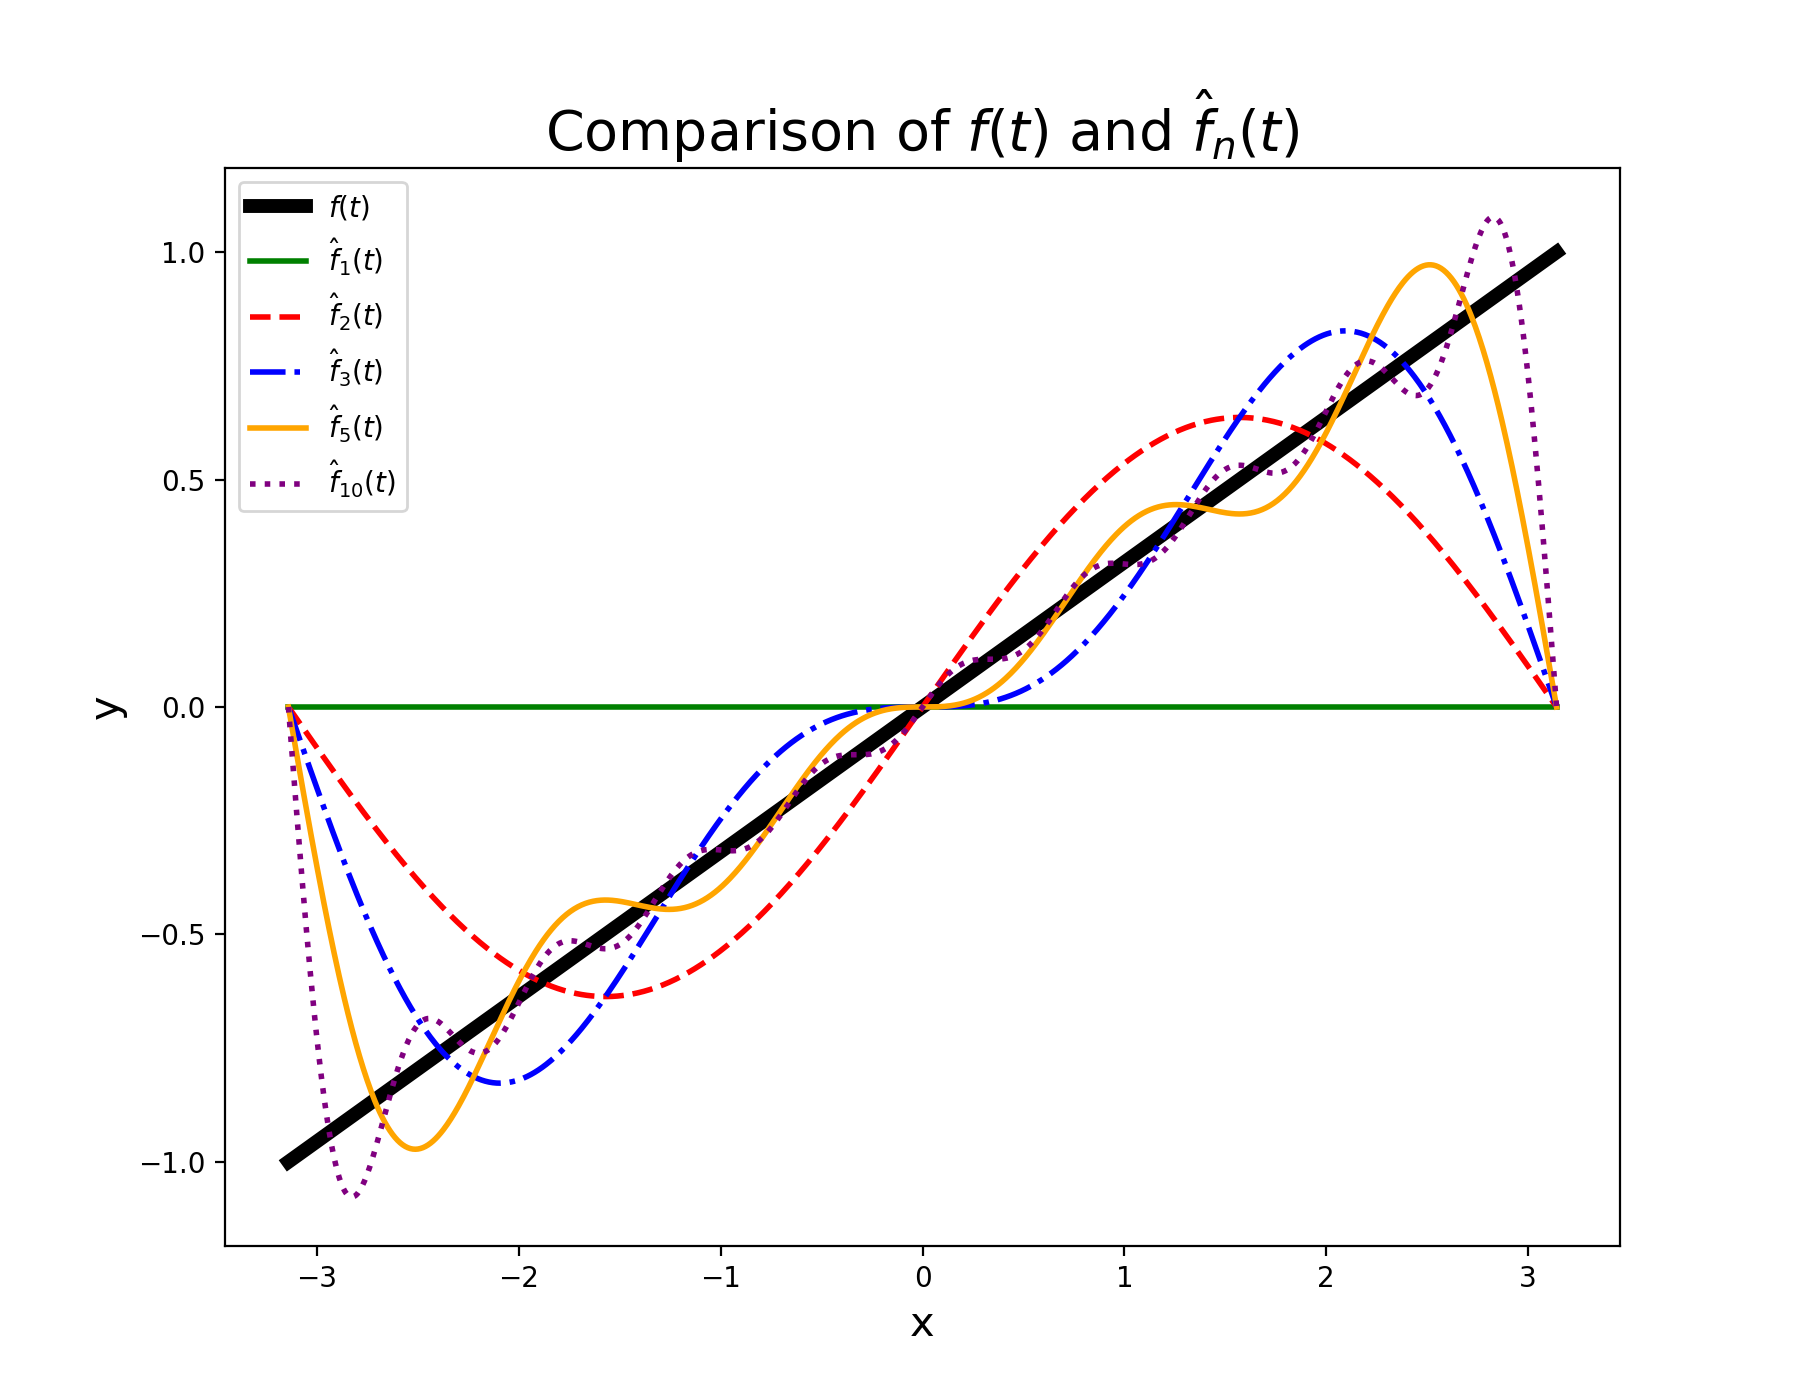

In [17]:
%matplotlib notebook

import matplotlib.pyplot as plt

#Defintion for FourierApprox function
#Takes in a function f as input
#Omitted n argument and instead looped through n = 1, 2, 3, 5, 10
def FourierApprox(f):
    pi = np.pi
    
    #Create list of n values
    n_vals = [1, 2, 3, 5, 10]
    
    #Create lists of colors and linetypes for the graph
    colors = ["green", "red", "blue", "orange", "purple"]
    line_styles = ['solid', '--', '-.', '-', ':']
    
    #Initialize x grid
    x = np.linspace(-pi, pi, 1000)
    
    #Initialize y values for original function
    y_1 = [f(num) for num in x]
    
    #Plot original function
    plt.plot(x, y_1, marker='', color='black', linewidth=5, label = r"$f(t)$")
    
    #Loop through list of n values
    for k in range(len(n_vals)):
        #Get coefficients
        a, b = FourierCoeff(f, n_vals[k])
    
        
        y_2 = []
    
        #Loop through x grid
        for i in range(len(x)):
            f_n = 0.0
            
            #Compute Fourier approximation at point x[i]
            for j in range(len(a)):
                if j == 0:
                    f_n += a[j] * 1/np.sqrt(2) + b[j] * np.sin(x[i]*j)
                else:
                    f_n += a[j] * np.cos(x[i] * j) + b[j] * np.sin(x[i] * j)
        
            y_2.append(f_n)
       
        #Plot Fourier approximation
        plt.plot(x, y_2, marker='', color=colors[k], linestyle = line_styles[k], 
                 linewidth=2, label = r"$\hat{f}_{%i}(t)$" %n_vals[k])
    
    #Complete plot
    plt.title(r"Comparison of $f(t)$ and $\hat{f}_n(t)$", fontsize = 20)
    plt.ylabel("y", fontsize = 15)
    plt.xlabel("x", fontsize = 15)
    plt.rcParams["figure.figsize"] = [9,7]
    plt.legend()

#Test run
FourierApprox(lambda x: x/np.pi)

<IPython.core.display.Javascript object>


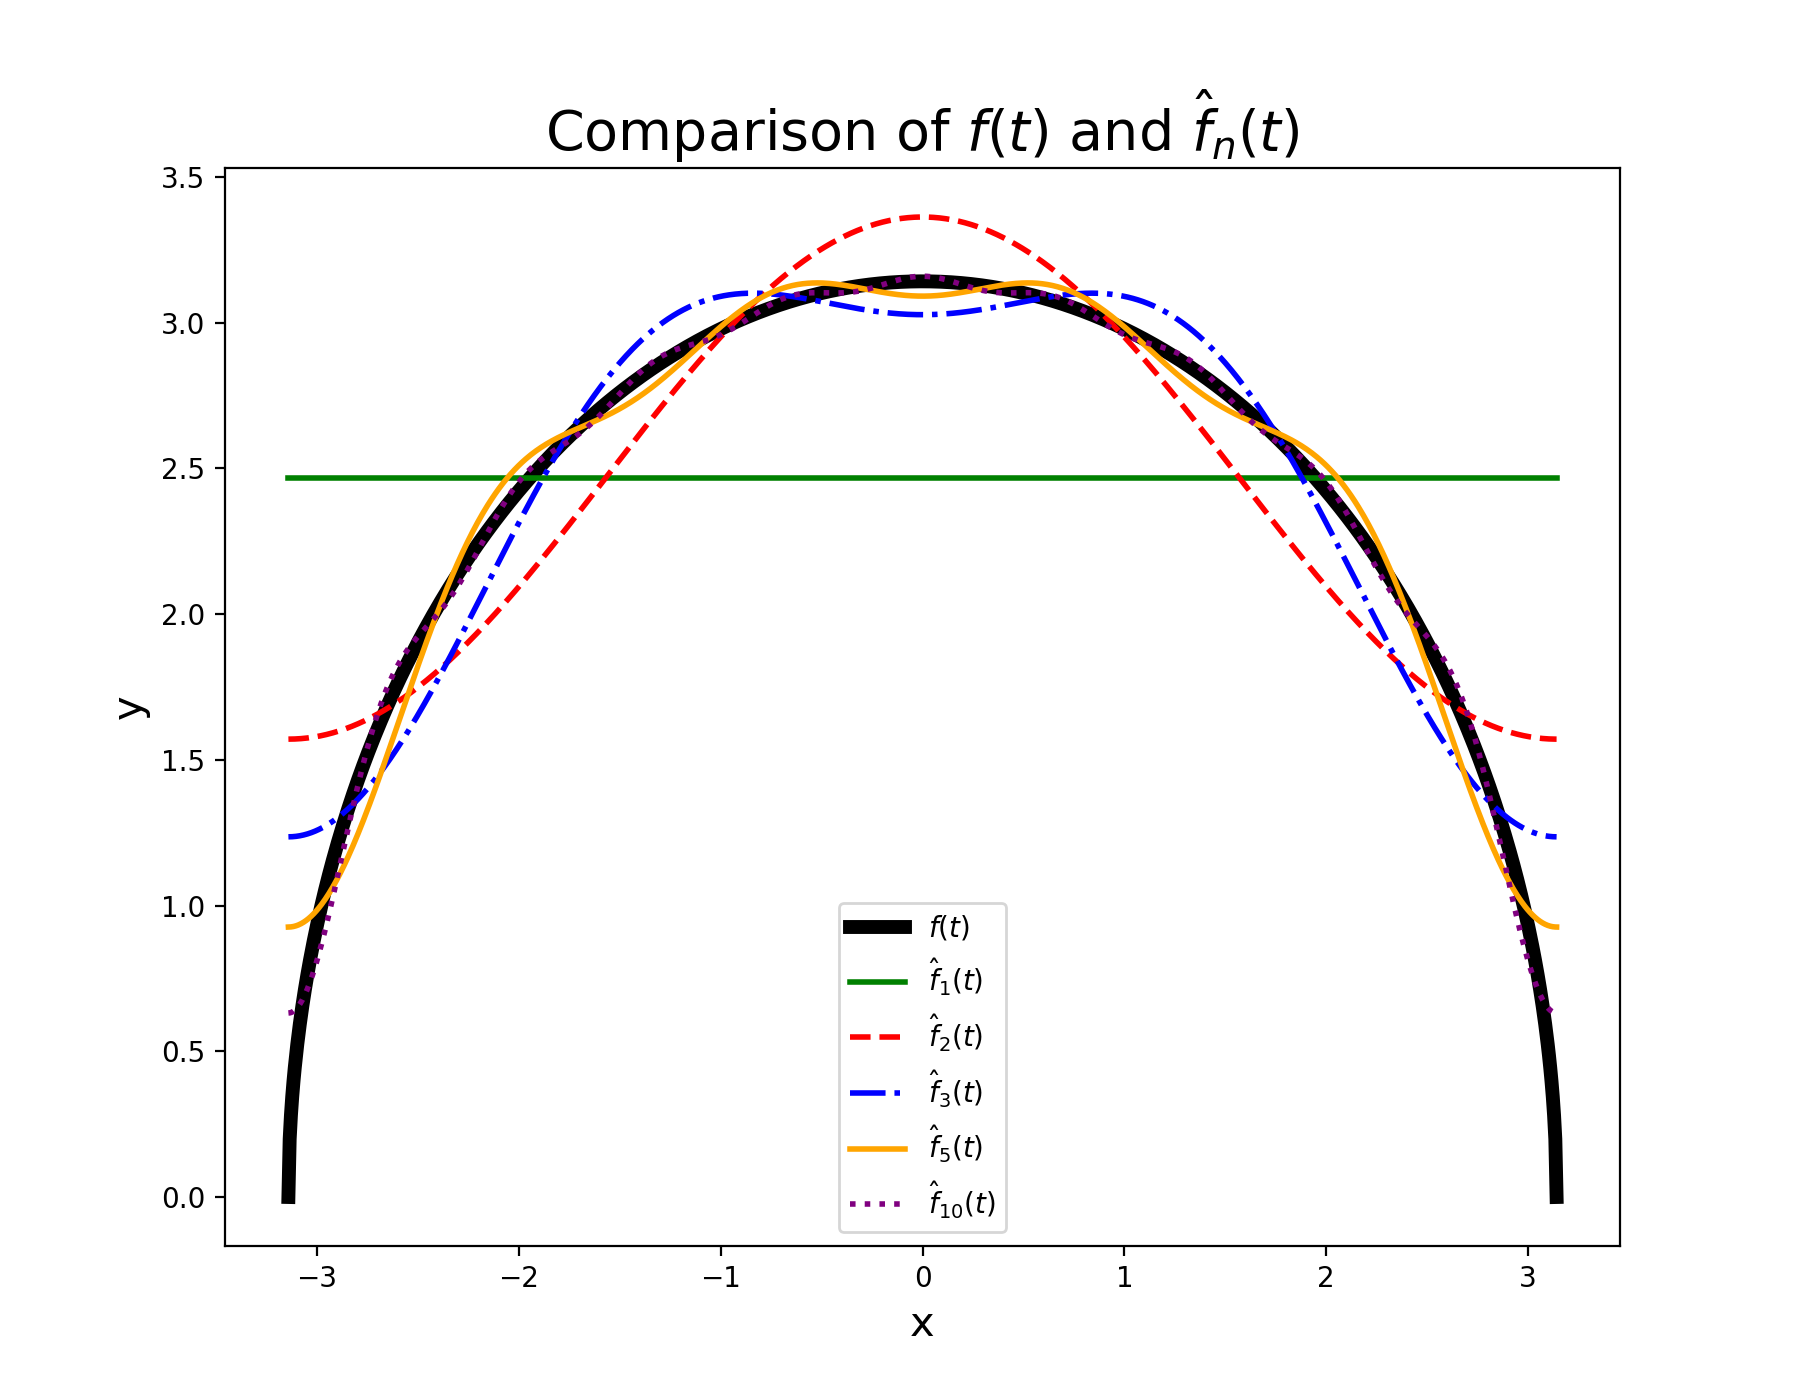

In [15]:
%matplotlib notebook

FourierApprox(lambda x: np.sqrt(np.abs(np.pi**2 - x**2)))

<IPython.core.display.Javascript object>


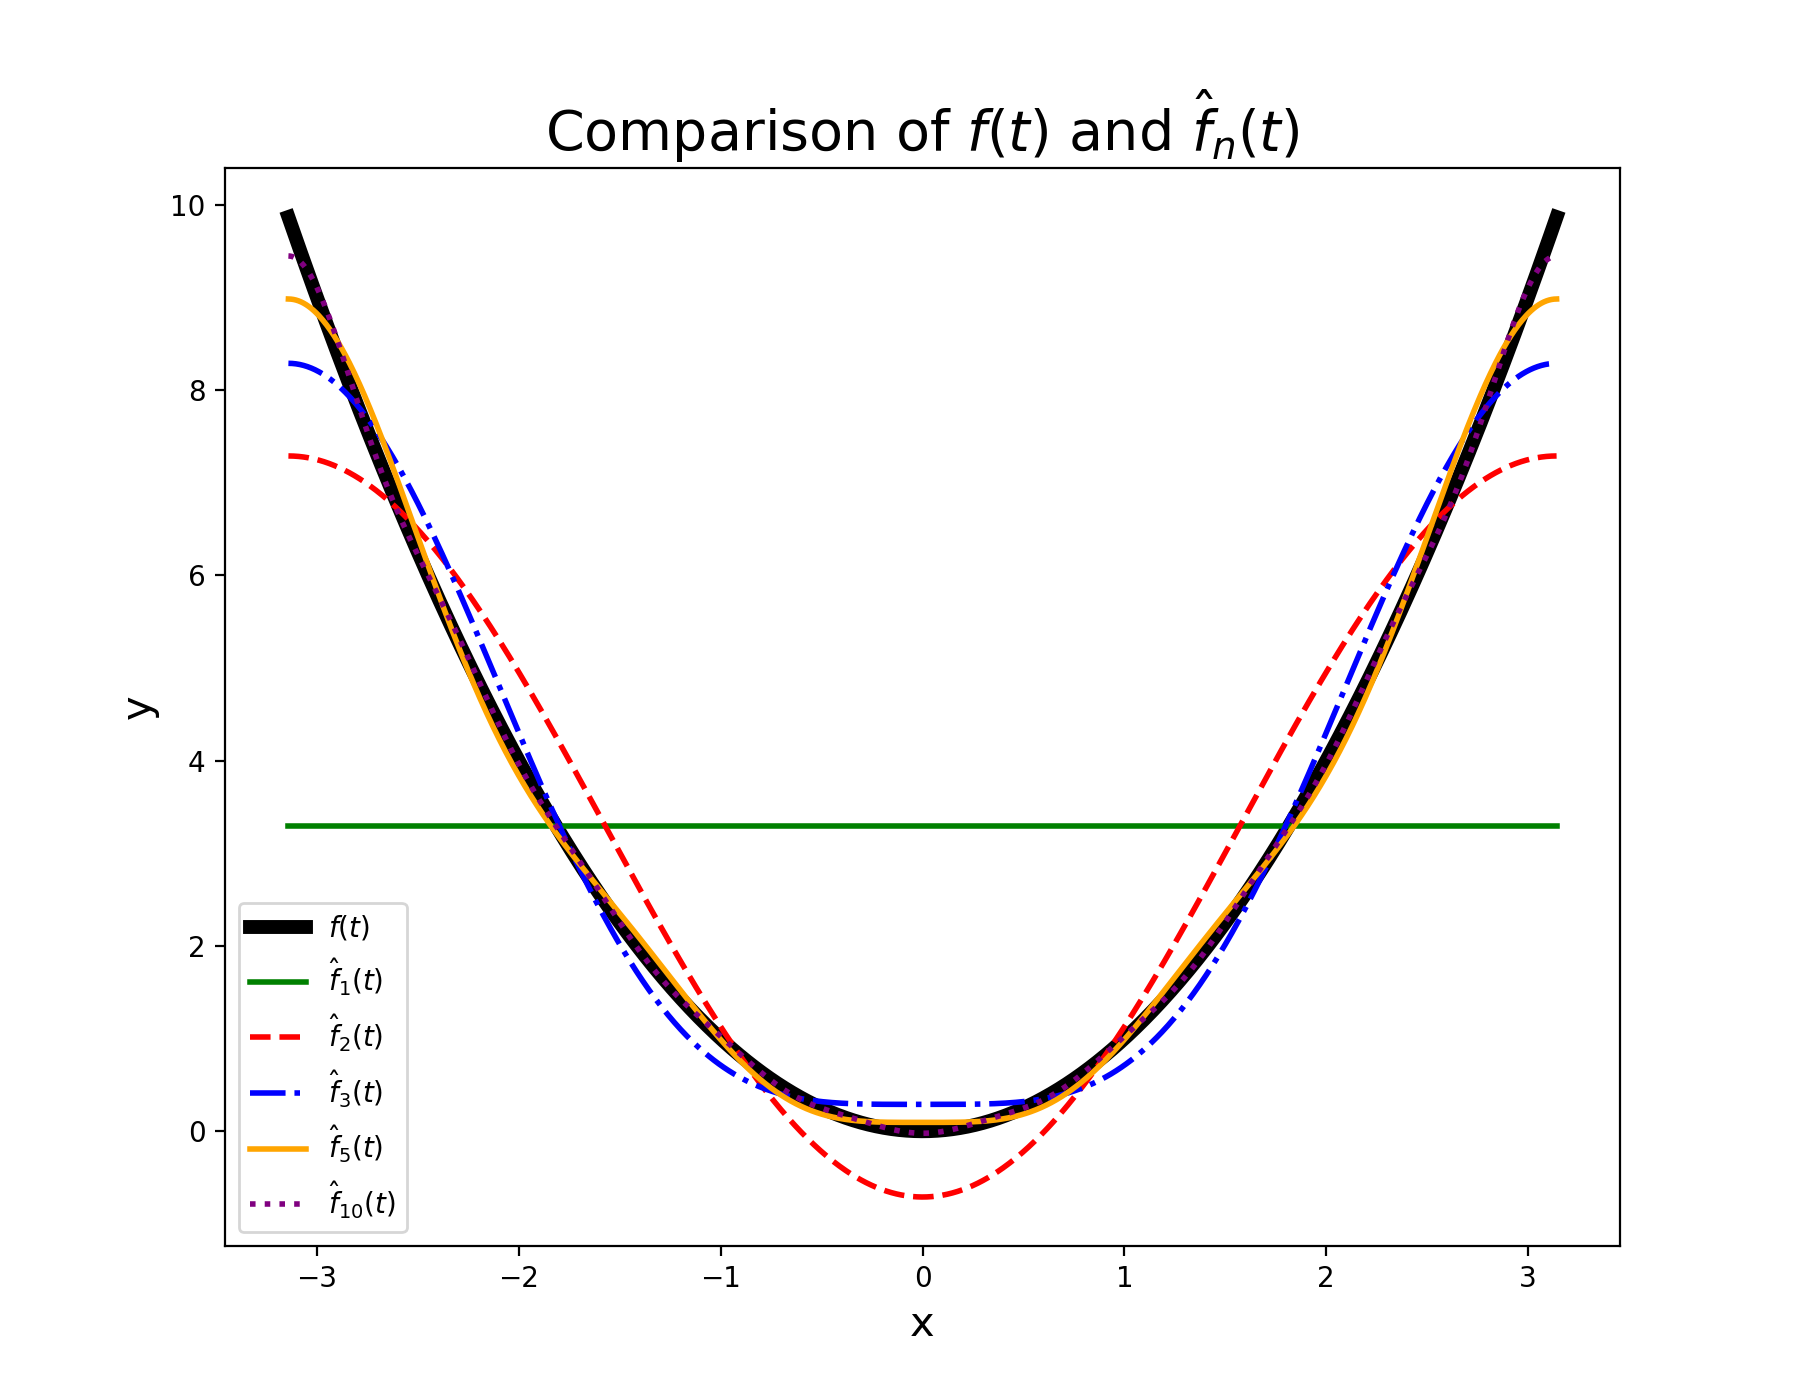

In [12]:
%matplotlib notebook

FourierApprox(lambda x: x**2)

<ul>
    <li>(20+13+15 = 48) I adjusted the number of subintervals for the Simpson rule to 200. Now you can see that a higher n provides a better approximation.</li>
    <li>In Problem 2, your method calculated Fourier coefficients for $0 \le i \le n-1$, so it is missing $a_n$ and $b_n$.</li>
    <li>For the second function $f(x) = \sqrt{\pi^2-x^2}$, if you change the the number of subintervals then you may see some strange error. It is caused by a rounding error when $x=\pm \pi$, so $\sqrt{\pi^2-x^2}$ may be a square root of a negative number. By taking the absolute value of the inside, we may remove the problem.</li>
</ul>